### ESM2 SDI - Cours de THGR 2020-2021

---------
<center><h1 style="background-color:#c0cfc0;height:50px"> TP4 : Programmation en Python d'algorithmes présentés en cours </h1> </center>

----------


## Exercice 1 : 

### 1.	Ecrire une fonction " A_cycle() "qui permet de déterminer si un graphe donné admet un ou plusieurs circuits (cycle) et l'appliquer sur le graphe  $\vec G = \left( {S,{\vec {\cal A}}} \right)$ avec : $S = \left\{ {0,\;1,\; \ldots ,\;5} \right\}$ et ${\vec {\cal A}} = \left\{ {\left( {0,1} \right),\left( {1,2} \right),\left( {1,4} \right),\left( {2,5} \right),\left( {4,0} \right),\left( {4,3} \right)} \right\}$.

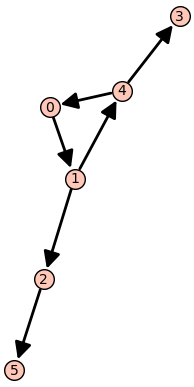

In [39]:
G = DiGraph({0:[1],1:[2,4], 2:[5], 4:[3, 0]})
G.show()
 

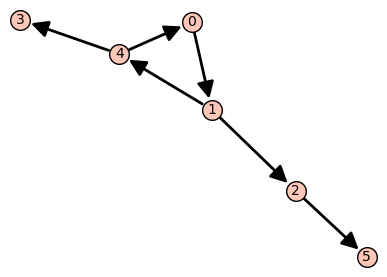

Le graphe a au moins un cycle de longueur k = 3


### 2. Exécuter la cellule ci-dessous et comparer.

In [7]:
L=G.all_simple_cycles()
len(L),L

(1, [[0, 1, 4, 0]])

### 3. Ecrire une fonction " rang_sommet() " qui calcule le rang d'un sommet quelconque d'un graphe orienté sans circuit. \\
## <span style= "color:#00B8DE">  Rappel : 
Le digraphe $\vec G = \left( {S,{\vec {\cal A}}} \right)$  est sans circuit si et seulement si on peut attribuer à chaque sommet $s$  un nombre $r\left( s \right)$, appelé rang de $s$, de manière que pour tout arc $\left( {x,s} \right)$ de $\vec G$ on ait $r\left( x \right) < r\left( s \right)$ (Dans une arborescence, le rang est la distance à la racine). Appliquer cette fonction au graphe ci-dessous :
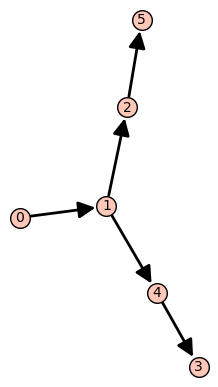

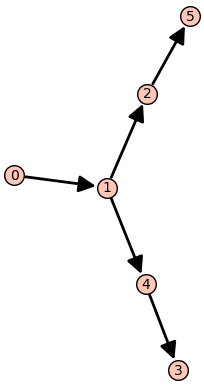

Le rang du sommet 0 est : 1
Le rang du sommet 1 est : 2
Le rang du sommet 2 est : 3
Le rang du sommet 3 est : 4
Le rang du sommet 4 est : 3
Le rang du sommet 5 est : 4


In [18]:
# REPONSE :
G=DiGraph()
G.add_vertices([0,1,2,3,4,5])
G.add_edges([(0,1),(1,2),(1,4),(4,3),(2,5)])
G.show()
def rang_sommet(G,v):
    rang= 0
    for x in G.edges():
        if x[1]==v:
            rang=rang_sommet(G,x[0])
    return rang+1
for v in G.vertices():
    print(f'Le rang du sommet {v} est : {rang_sommet(G,v)}')

### 3.	Ecrire une fonction " liste_niveaux() " qui donne la décomposition en niveaux (sous ensemble de sommets de même rang) d'un graphe sans circuits et appliquer ce programme au graphe ci-dessus.

In [21]:
def liste_niveaux(G):
    niveaux = {}
    for v in G.vertices():
        rang = rang_sommet(G,v)
        print(f'Le rang du sommet {v} est : {rang}')
        if rang not in niveaux:
            niveaux[rang] = [v]
        else:
            niveaux[rang].append(v)
            
    return list(niveaux.values())

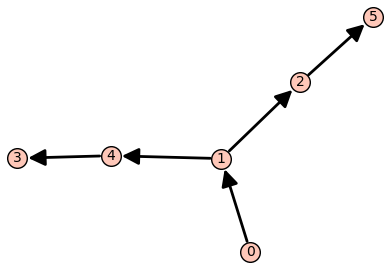

Le rang du sommet 0 est : 1
Le rang du sommet 1 est : 2
Le rang du sommet 2 est : 3
Le rang du sommet 3 est : 4
Le rang du sommet 4 est : 3
Le rang du sommet 5 est : 4


[[0], [1], [2, 4], [3, 5]]

In [22]:
# REPONSE :
G.show()
liste_niveaux(G)   

### 4.	Calculer le rang de chaque sommet du graphe ci-dessous et déterminer les niveaux du graphe :
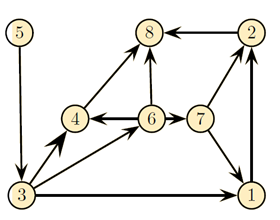

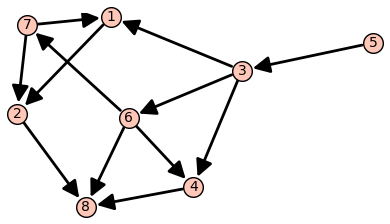

In [45]:
K=DiGraph()
K.add_vertices([1,2,3,4,5,6,7,8])
K.add_edges([(1,2),(2,8),(3,4),(3,6),(3,1),(4,8),(5,3),(6,7),(6,8),(6,4),(7,1),(7,2)])
K.show()

In [46]:
# REPONSE :
liste_niveaux(K) 

Le rang du sommet 1 est : 5
Le rang du sommet 2 est : 5
Le rang du sommet 3 est : 2
Le rang du sommet 4 est : 4
Le rang du sommet 5 est : 1
Le rang du sommet 6 est : 3
Le rang du sommet 7 est : 4
Le rang du sommet 8 est : 4


[[1, 2], [3], [4, 7, 8], [5], [6]]

## Exercice 2.

### Représenter le graphe $\vec G = \left( {S,{\vec {\cal A}}} \right)$ donné par sa matrice d'adjacence :
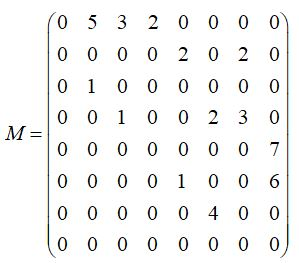

In [31]:
M=matrix([[0,5,3,2,0,0,0,0],
          [0,0,0,0,2,0,2,0],
          [0,1,0,0,0,0,0,0],
          [0,0,1,0,0,2,3,0],
          [0,0,0,0,0,0,0,7],
          [0,0,0,0,1,0,0,6],
          [0,0,0,0,0,4,0,0],
          [0,0,0,0,0,0,0,0]])
G=DiGraph(data=M,format='weighted_adjacency_matrix')

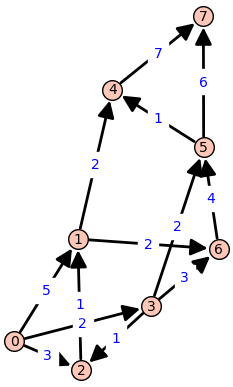

In [32]:
# REPONSE :
G.show(edge_labels=True)

###  Implémenter l'algorithme de DIJKSTRA et l'appliquer au graphe ci-dessus.


In [38]:
def Dijkstra(Graph, s):
   
    G = Graph.to_dictionary(edge_labels=True)
    P = {}
    for v in G:
        P[v] = [float('inf'), None]
    P[s] = [0, None]
    Q = [v for v in G]
    while Q:
        u = Q[0]
        for v in Q:
            if P[v][0] < P[u][0]:
                u = v
        Q.remove(u)
        for v in G[u]:
            alt = P[u][0] + G[u][v]
            if alt < P[v][0]:
                P[v] = [alt, u]
    output = []
    for fro in P:
        to , dist = P[fro]
        if dist == None:
            output.append((fro,to,[]))
            continue
        output.append((fro,to,[dist]))
    return output

Dijkstra(G, 0)

[(0, 0, []),
 (1, 4, [2]),
 (2, 3, [0]),
 (3, 2, [0]),
 (4, 5, [5]),
 (5, 4, [3]),
 (6, 5, [3]),
 (7, 10, [5])]

In [34]:
# REPONSE :



[(0, 0, []), (3, 2, [0]), (2, 3, [0]), (5, 4, [3]), (1, 4, [2]), (6, 5, [3]), (4, 5, [5]), (7, 10, [5])]


### Existe-il une fonction `SAGE`  qui execute l'algorithme de DIJKSTRA ?
Effectuer une recherche sur cette page:

https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/base/boost_graph.html

### Fin du TP